In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # linear algebra

In [2]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
list_col


[['Spain', 'France'], ['11', '12']]

In [3]:
zipped = list(zip(list_label,list_col))
zipped

[('country', ['Spain', 'France']), ('population', ['11', '12'])]

In [4]:
data_dict = dict(zipped)
data_dict

{'country': ['Spain', 'France'], 'population': ['11', '12']}

In [5]:
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [6]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [7]:
df["surface_area"]=["500303","400567"]

In [8]:
df

,country,population,capital,surface_area
0,Spain,11,madrid,500303
1,France,12,paris,400567


In [9]:
# Broadcasting
df["income"] = 0 #Broadcasting entire column
df

,country,population,capital,surface_area,income
0,Spain,11,madrid,500303,0
1,France,12,paris,400567,0


In [10]:
data = pd.read_csv('Data/movies.csv.zip')

In [11]:
data.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,162.501,8.704,26105
1,1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,192.686,8.696,19788
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,148.349,8.577,11954
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,113.543,8.567,15358
4,4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,79.276,8.543,8228


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9354 entries, 0 to 9353
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9354 non-null   int64  
 1   id            9354 non-null   int64  
 2   title         9354 non-null   object 
 3   overview      9353 non-null   object 
 4   release_date  9354 non-null   object 
 5   popularity    9354 non-null   float64
 6   vote_average  9354 non-null   float64
 7   vote_count    9354 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 584.8+ KB


<Axes: >

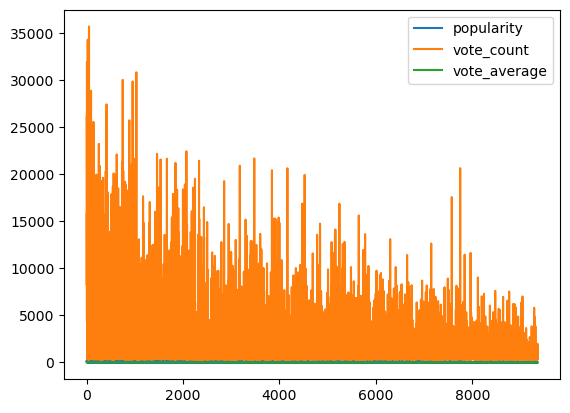

In [13]:
# Plotting all data 
data1 = data.loc[:,["popularity","vote_count","vote_average"]]
data1.plot()
# it is confusing

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

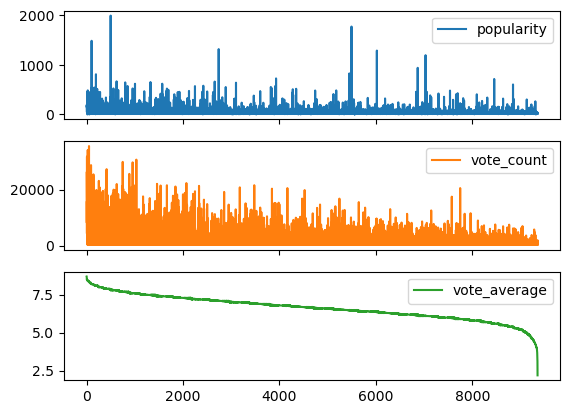

In [14]:
data1.plot(subplots=True)

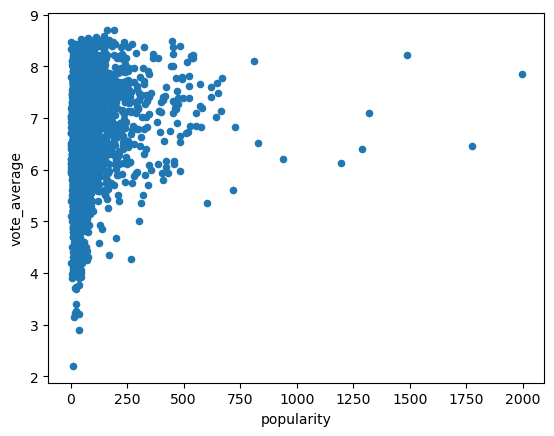

In [15]:
data1.plot(kind="scatter",x="popularity",y="vote_average")
plt.show()

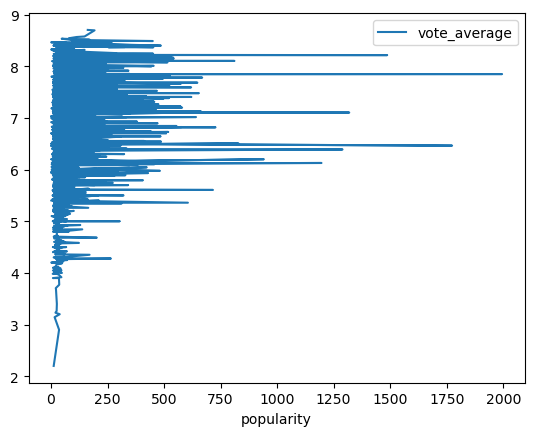

In [16]:
data1.plot(kind="line",x="popularity",y="vote_average")
plt.show()

<Axes: ylabel='Frequency'>

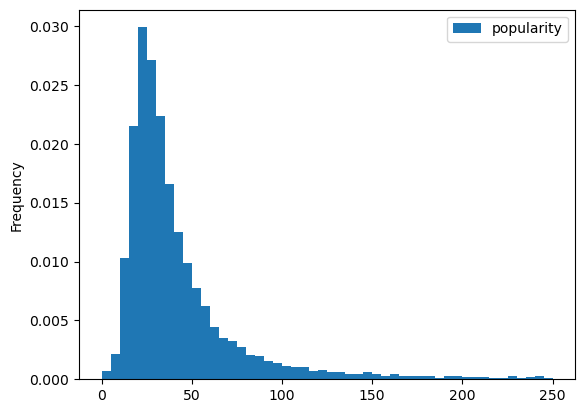

In [17]:
# hist plot  
data1.plot(kind="hist", y="popularity", bins=50, range=(0,250), density=True)


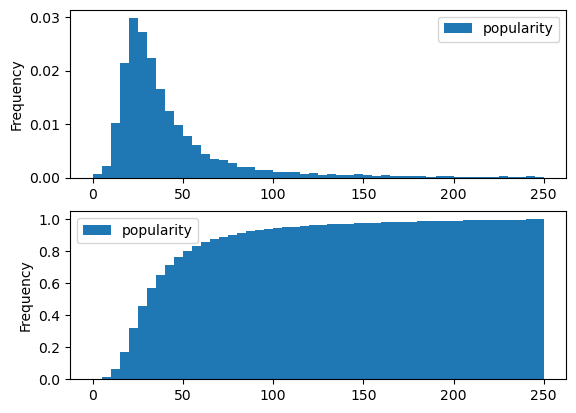

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data1.plot(kind="hist", y="popularity", bins=50, range=(0, 250), density=True, ax=axes[0])
data1.plot(kind="hist", y="popularity", bins=50, range=(0, 250), density=True, ax=axes[1], cumulative=True)
plt.savefig('graph.png')
plt.show()

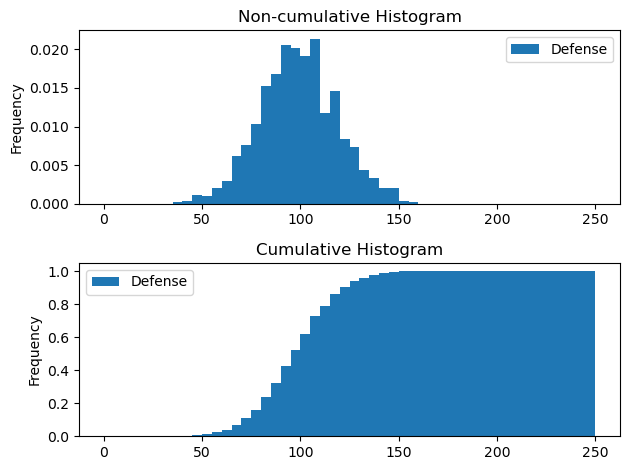

In [19]:
np.random.seed(0)
data1 = pd.DataFrame({
    'Defense': np.random.normal(loc=100, scale=20, size=1000)
})

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot a non-cumulative histogram on the first subplot
data1.plot(kind="hist", y="Defense", bins=50, range=(0, 250), density=True, ax=axes[0])
axes[0].set_title('Non-cumulative Histogram')

# Plot a cumulative histogram on the second subplot
data1.plot(kind="hist", y="Defense", bins=50, range=(0, 250), density=True, ax=axes[1], cumulative=True)
axes[1].set_title('Cumulative Histogram')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('graph.png')
plt.show()

In [20]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [21]:
# In order to practice lets take head of pokemon data and add it a time list
# Assuming data is your original DataFrame
data2 = data.head().copy()

# Create a datetime list
date_list = ["1992-01-10", "1992-02-10", "1992-03-10", "1993-03-15", "1993-03-16"]
datetime_object = pd.to_datetime(date_list)

# Assign the datetime list to the new "date" column using .loc
data2.loc[:, "date"] = datetime_object

# Set the "date" column as the index
data2 = data2.set_index("date")

data2

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
date,,,,,,,,
1992-01-10,0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,162.501,8.704,26105
1992-02-10,1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,192.686,8.696,19788
1992-03-10,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,148.349,8.577,11954
1993-03-15,3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,113.543,8.567,15358
1993-03-16,4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,79.276,8.543,8228


In [23]:

# Assuming data2 is already defined as in your previous code
data2 = data2.select_dtypes(include='number')

# Resample the data annually and compute the mean
result = data2.resample("A").mean()


In [25]:
result

,Unnamed: 0,id,popularity,vote_average,vote_count
date,,,,,
1992-12-31,1.0,252.0,167.845333,8.659,19282.333333
1993-12-31,3.5,406.5,96.409500,8.555,11793.000000


In [27]:
# Lets resample with month
data2.resample("M").mean()
# As you can see there are a lot of nan because data2 does not include all months

,Unnamed: 0,id,popularity,vote_average,vote_count
date,,,,,
1992-01-31,0.0,278.0,162.5010,8.704,26105.0
1992-02-29,1.0,238.0,192.6860,8.696,19788.0
1992-03-31,2.0,240.0,148.3490,8.577,11954.0
1992-04-30,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN


In [29]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")

,Unnamed: 0,id,popularity,vote_average,vote_count
date,,,,,
1992-01-31,0.000000,278.000000,162.5010,8.704000,26105.000000
1992-02-29,1.000000,238.000000,192.6860,8.696000,19788.000000
1992-03-31,2.000000,240.000000,148.3490,8.577000,11954.000000
1992-04-30,2.083333,255.333333,145.4485,8.576167,12237.666667
1992-05-31,2.166667,270.666667,142.5480,8.575333,12521.333333
1992-06-30,2.250000,286.000000,139.6475,8.574500,12805.000000
1992-07-31,2.333333,301.333333,136.7470,8.573667,13088.666667
1992-08-31,2.416667,316.666667,133.8465,8.572833,13372.333333
1992-09-30,2.500000,332.000000,130.9460,8.572000,13656.000000


In [31]:
# Or we can interpolate with mean()
data2.resample("M").mean().interpolate("linear")

,Unnamed: 0,id,popularity,vote_average,vote_count
date,,,,,
1992-01-31,0.000,278.000,162.501000,8.704000,26105.000000
1992-02-29,1.000,238.000,192.686000,8.696000,19788.000000
1992-03-31,2.000,240.000,148.349000,8.577000,11954.000000
1992-04-30,2.125,253.875,144.020708,8.575167,11940.583333
1992-05-31,2.250,267.750,139.692417,8.573333,11927.166667
1992-06-30,2.375,281.625,135.364125,8.571500,11913.750000
1992-07-31,2.500,295.500,131.035833,8.569667,11900.333333
1992-08-31,2.625,309.375,126.707542,8.567833,11886.916667
1992-09-30,2.750,323.250,122.379250,8.566000,11873.500000
